<a href="https://colab.research.google.com/github/vinayak-1508/fake_news_detection/blob/main/FAKE_NEWS_DETECTION_USING_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
fake=pd.read_csv('https://raw.githubusercontent.com/mehra-dimple/Social-Media-Fake-News-Detection/main/Data/politifact_fake.csv')
fake

,id,news_url,title,tweet_ids
0,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,937349434668498944\t937379378006282240\t937380...
1,politifact15156,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,972666281441878016\t972678396575559680\t972827...
2,politifact14745,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,929405740732870656\t929439450400264192\t929439...
3,politifact14355,https://howafrica.com/oscar-pistorius-attempts...,Oscar Pistorius Attempts To Commit Suicide,886941526458347521\t887011300278194176\t887023...
4,politifact15371,http://washingtonsources.org/trump-votes-for-d...,Trump Votes For Death Penalty For Being Gay,915205698212040704\t915242076681506816\t915249...
...,...,...,...,...
427,politifact14944,http://thehill.com/homenews/senate/369928-who-...,Who is affected by the government shutdown?,954602090462146560\t954602093171609600\t954650...
428,politifact14071,https://web.archive.org/web/20170322070001/htt...,Lindsey Graham Threatens To Convert To Democra...,740351669834244096\t740391312277573632\t740474...
429,politifact13577,http://archive.is/DQqCx,ELECTORAL COLLEGE ELECTOR COMMITS SUICIDE TO A...,810939651900907520\t814738996706164737\t814917...
430,politifact13560,politicono.com/palin-calls-boycott-mall-americ...,Sarah Palin Calls To Boycott Mall Of America B...,805216591424212993\t805222830023540736\t805223...


In [ ]:
true=pd.read_csv('https://raw.githubusercontent.com/mehra-dimple/Social-Media-Fake-News-Detection/main/Data/politifact_real.csv')
true

,id,news_url,title,tweet_ids
0,politifact14984,http://www.nfib-sbet.org/,National Federation of Independent Business,967132259869487105\t967164368768196609\t967215...
1,politifact12944,http://www.cq.com/doc/newsmakertranscripts-494...,comments in Fayetteville NC,942953459\t8980098198\t16253717352\t1668513250...
2,politifact333,https://web.archive.org/web/20080204072132/htt...,"Romney makes pitch, hoping to close deal : Ele...",NaN
3,politifact4358,https://web.archive.org/web/20110811143753/htt...,Democratic Leaders Say House Democrats Are Uni...,NaN
4,politifact779,https://web.archive.org/web/20070820164107/htt...,"Budget of the United States Government, FY 2008",89804710374154240\t91270460595109888\t96039619...
...,...,...,...,...
619,politifact14731,https://www.flake.senate.gov/public/index.cfm/...,Flake: “Religious tests should have no place i...,NaN
620,politifact329,https://web.archive.org/web/20080131000131/htt...,Change We Can Believe In,634287923135909888\t946743411100536832\t946816...
621,politifact1576,http://www.youtube.com/watch?v=4O8CxZ1OD58,deputy director of national health statistics ...,NaN
622,politifact4720,http://www.youtube.com/watch?v=EhyMplwY6HY,Romneys ProLife Conversion Myth or Reality Jun...,188871706637647874


In [ ]:
fake['target'] = 'fake'
true['target'] = 'true'

In [ ]:
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape
data

,id,news_url,title,tweet_ids,target
0,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,937349434668498944\t937379378006282240\t937380...,fake
1,politifact15156,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,972666281441878016\t972678396575559680\t972827...,fake
2,politifact14745,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,929405740732870656\t929439450400264192\t929439...,fake
3,politifact14355,https://howafrica.com/oscar-pistorius-attempts...,Oscar Pistorius Attempts To Commit Suicide,886941526458347521\t887011300278194176\t887023...,fake
4,politifact15371,http://washingtonsources.org/trump-votes-for-d...,Trump Votes For Death Penalty For Being Gay,915205698212040704\t915242076681506816\t915249...,fake
...,...,...,...,...,...
1051,politifact14731,https://www.flake.senate.gov/public/index.cfm/...,Flake: “Religious tests should have no place i...,NaN,true
1052,politifact329,https://web.archive.org/web/20080131000131/htt...,Change We Can Believe In,634287923135909888\t946743411100536832\t946816...,true
1053,politifact1576,http://www.youtube.com/watch?v=4O8CxZ1OD58,deputy director of national health statistics ...,NaN,true
1054,politifact4720,http://www.youtube.com/watch?v=EhyMplwY6HY,Romneys ProLife Conversion Myth or Reality Jun...,188871706637647874,true


In [ ]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [ ]:
data.head(10)

,id,news_url,title,tweet_ids,target
0,politifact13766,http://ladylibertysnews.com/muslims-offended-k...,Radical Muslims in Australia OFFENDED That The...,792890826321985537\t793144119249907712\t798238...,fake
1,politifact15352,https://dailyworldupdate.us/2018/05/01/breakin...,BREAKING: Hillary Clinton Killed In Monster Tr...,991523587638087685\t991596426240167936\t991596...,fake
2,politifact2393,http://www.youtube.com/watch?v=A7jJI1cfEgc&fea...,"Nancy Pelosi, Wicked Witch of the West",15845981846\t15846334646\t15846335687\t1592547...,true
3,politifact13229,https://www.washingtonpost.com/news/post-polit...,Donald Trump featured in new jihadist recruitm...,683165120835485696\t683187902713561089\t683313...,true
4,politifact14920,https://www.ecfr.gov/cgi-bin/text-idx?gp=&SID=...,eCFR — Code of Federal Regulations,1000393413857038337\t1000539788850548737\t1000...,true
5,politifact554,"http://www.foxnews.com/story/0,2933,373450,00....",Transcript: Bob Barr on 'FOX News Sunday',416343414662131712,true
6,politifact6612,http://www.brighthorizons.com/about/aboutbh.aspx,About Bright Horizons Child Care & Family Solu...,NaN,true
7,politifact12294,http://therightscoop.com/watch-full-ted-cruz-p...,WATCH FULL Ted Cruz presser on new deal with K...,NaN,true
8,politifact4879,http://www.unionleader.com/article/20111129/OP...,"Rick Santorum: By amending constitution, we ca...",NaN,true
9,politifact258,https://web.archive.org/web/20080108202709/htt...,Romney For President Launches New Television A...,NaN,true


In [ ]:
data.drop(["news_url"],axis=1,inplace=True)
data.head()

,id,title,tweet_ids,target
0,politifact13766,Radical Muslims in Australia OFFENDED That The...,792890826321985537\t793144119249907712\t798238...,fake
1,politifact15352,BREAKING: Hillary Clinton Killed In Monster Tr...,991523587638087685\t991596426240167936\t991596...,fake
2,politifact2393,"Nancy Pelosi, Wicked Witch of the West",15845981846\t15846334646\t15846335687\t1592547...,true
3,politifact13229,Donald Trump featured in new jihadist recruitm...,683165120835485696\t683187902713561089\t683313...,true
4,politifact14920,eCFR — Code of Federal Regulations,1000393413857038337\t1000539788850548737\t1000...,true


In [ ]:
data.drop(["tweet_ids"],axis=1,inplace=True)
data.head()

,id,title,target
0,politifact13766,Radical Muslims in Australia OFFENDED That The...,fake
1,politifact15352,BREAKING: Hillary Clinton Killed In Monster Tr...,fake
2,politifact2393,"Nancy Pelosi, Wicked Witch of the West",true
3,politifact13229,Donald Trump featured in new jihadist recruitm...,true
4,politifact14920,eCFR — Code of Federal Regulations,true


In [ ]:
data['title']=data['title'].apply(lambda  x: x.lower())
data.head()

,id,title,target
0,politifact13766,radical muslims in australia offended that the...,fake
1,politifact15352,breaking: hillary clinton killed in monster tr...,fake
2,politifact2393,"nancy pelosi, wicked witch of the west",true
3,politifact13229,donald trump featured in new jihadist recruitm...,true
4,politifact14920,ecfr — code of federal regulations,true


In [ ]:
labels=data.target
labels.head()

0    fake
1    fake
2    true
3    true
4    true
Name: target, dtype: object

In [ ]:
target=data.target.value_counts()
target

true    624
fake    432
Name: target, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


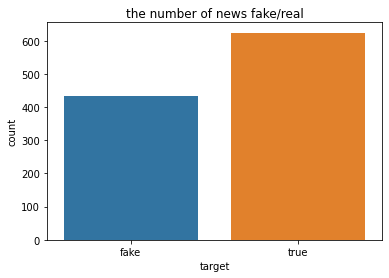

In [ ]:
sns.countplot(data.target)
plt.title('the number of news fake/real');

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['title'] = data['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data.head(10)

,id,title,target
0,politifact13766,radical muslims australia offended children si...,fake
1,politifact15352,breaking: hillary clinton killed monster truck...,fake
2,politifact2393,"nancy pelosi, wicked witch west",true
3,politifact13229,donald trump featured new jihadist recruitment...,true
4,politifact14920,ecfr — code federal regulations,true
5,politifact554,transcript: bob barr 'fox news sunday',true
6,politifact6612,bright horizons child care & family solutions,true
7,politifact12294,watch full ted cruz presser new deal kasich (u...,true
8,politifact4879,"rick santorum: amending constitution, balance ...",true
9,politifact258,"romney president launches new television ad, ""...",true


target
fake    432
true    624
Name: title, dtype: int64


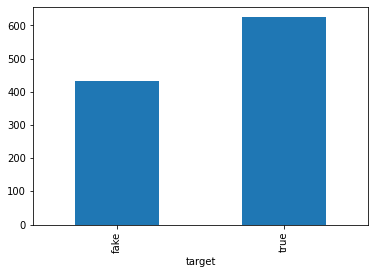

In [ ]:
print(data.groupby(['target'])['title'].count())
data.groupby(['target'])['title'].count().plot(kind="bar")
plt.show()

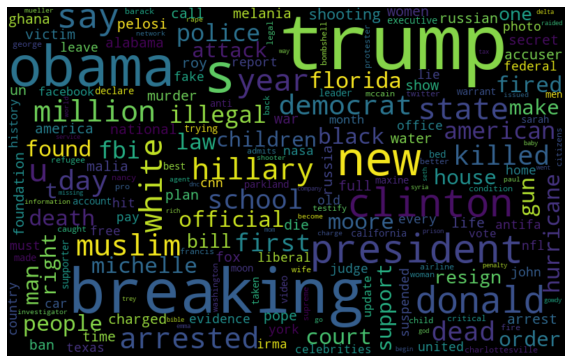

In [ ]:
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([title for title in fake_data.title])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

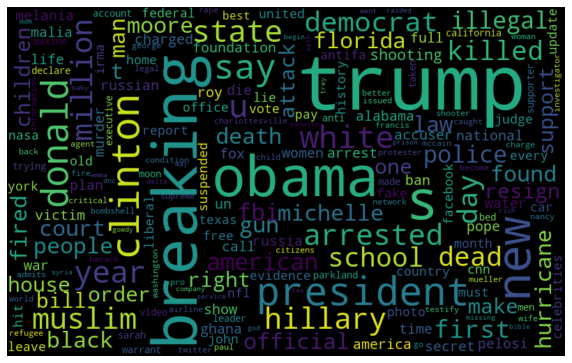

In [ ]:
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([title for title in fake_data.title])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

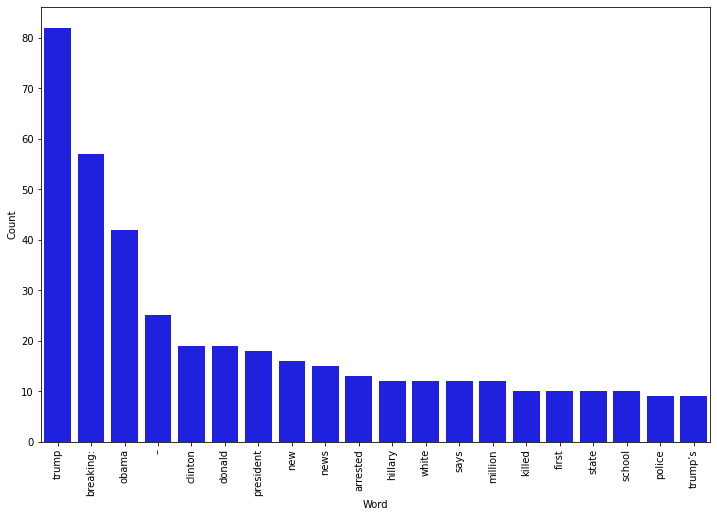

In [ ]:
counter(data[data["target"] == "fake"], "title", 20)

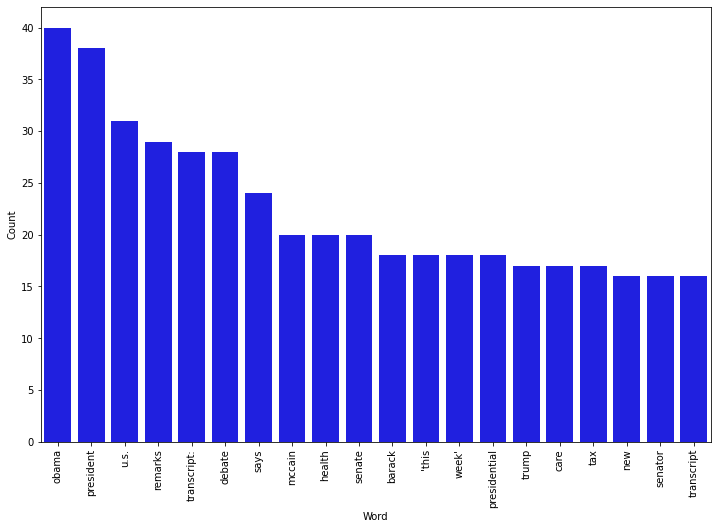

In [ ]:
counter(data[data["target"] == "true"], "title", 20)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data['title'], labels, test_size=0.2, random_state=7)

In [ ]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train)
tfidf_test=tfidf_vectorizer.transform(x_test)

In [ ]:
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 84.43%


In [ ]:
x = np.array(data["title"])
y = np.array(data["target"])

cv = CountVectorizer()
x = cv.fit_transform(x)

In [ ]:
tfvect = TfidfVectorizer(stop_words='english',max_df=0.7)
tfid_x_train = tfvect.fit_transform(x_train)
tfid_x_test = tfvect.transform(x_test)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.8490566037735849


In [ ]:
news_headline = "National Federation of Independent Business"
data = cv.transform([news_headline]).toarray()
print(model.predict(data))

['true']


In [ ]:
news_headline = "CA Exams 2021: Supreme Court asks ICAI to extend opt-out option for July exams, final order tomorrow"
data = cv.transform([news_headline]).toarray()
print(model.predict(data))

['fake']


In [ ]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Naive Bayes


In [ ]:
dct = dict()

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer



NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 83.96%


Confusion matrix, without normalization


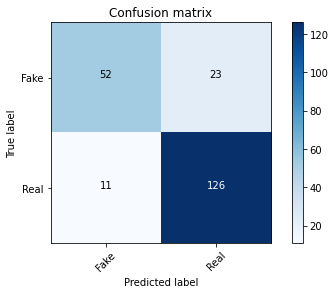

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])


Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(x_train, y_train)

# Accuracy
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 82.08%


Confusion matrix, without normalization


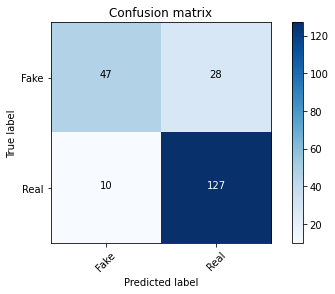

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20,
                                           splitter='best',
                                           random_state=42))])
# Fitting the model
model = pipe.fit(x_train, y_train)

# Accuracy
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 73.58%


Confusion matrix, without normalization


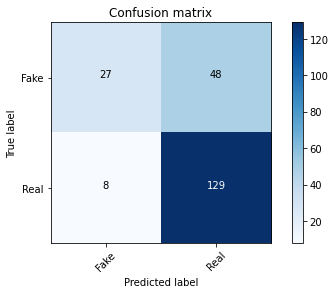

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 80.19%


Confusion matrix, without normalization


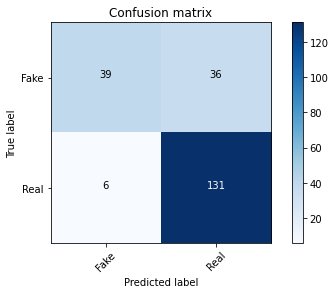

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

SVM

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 83.02%


Confusion matrix, without normalization


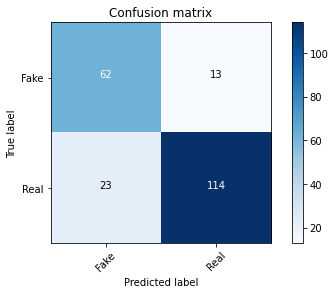

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

([<matplotlib.axis.YTick at 0x7fa419672a90>,
 <a list of 5 Text major ticklabel objects>)

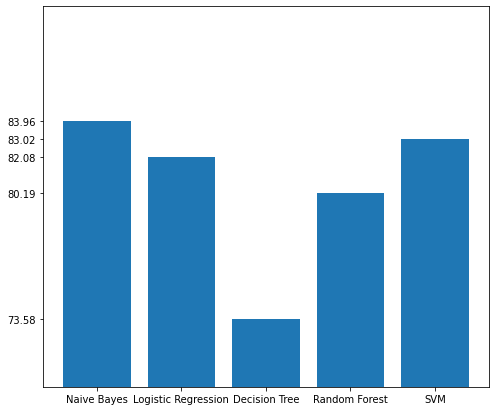

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(70,90)
plt.yticks((dct['Naive Bayes'], dct['Logistic Regression'], dct['Decision Tree'], dct['Random Forest'], dct['SVM']))